<a href="https://colab.research.google.com/github/udayanjansai/Regularization_Ridge_Lasso/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Study hours (X) and Marks (y)
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([35, 40, 50, 60, 65, 70])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([35, 40, 50, 60, 65, 70])
X_train, X_test, y_train, y_test=train_test_split(
X, y, test_size=0.3, random_state=42
)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred= lin_reg.predict(X_train)
y_test_pred=lin_reg.predict(X_test)

In [6]:
print(mean_squared_error(y_train, y_train_pred))
r2_score(y_train, y_train_pred)


1.875


0.9657142857142857

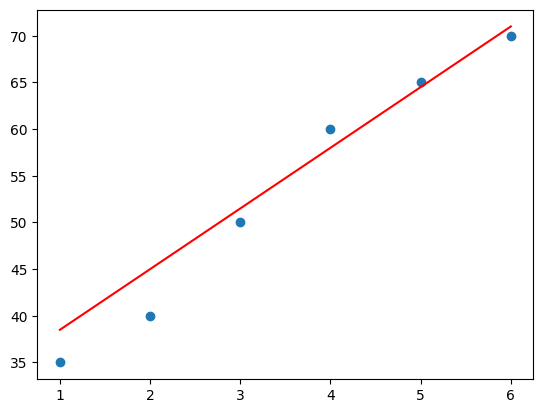

In [8]:
plt.scatter(X,y)
plt.plot(X,lin_reg.predict(X),color='red')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_pred)
r2=r2_score(y_train,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 1.875
R2 Score: 0.9657142857142857


In [9]:
poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

overfit_model = LinearRegression()
overfit_model.fit(X_train_poly, y_train)

y_train_pred_poly = overfit_model.predict(X_train_poly)
y_test_pred_poly = overfit_model.predict(X_test_poly)

In [10]:
print(mean_squared_error(y_train, y_train_pred_poly))
r2_score(y_train, y_train_pred_poly)

8.363894592162157e-24


1.0

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
X_poly=poly.fit_transform(X)


In [15]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(X_poly,y)

Ridge(alpha=1)

In [16]:
y_pred_ridge=ridge_reg.predict(X_poly)
print(mean_squared_error(y,y_pred_ridge))
r2_score(y,y_pred_ridge)

0.24058058055628095


0.9985320506949108

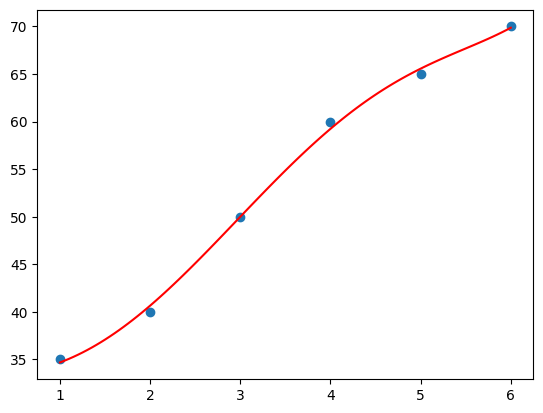

In [20]:
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_grid_poly=poly.transform(x_grid)
plt.scatter(X,y)
plt.plot(x_grid,ridge_reg.predict(x_grid_poly),color='red')
plt.show()

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)

y_lasso_pred = lasso.predict(X_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


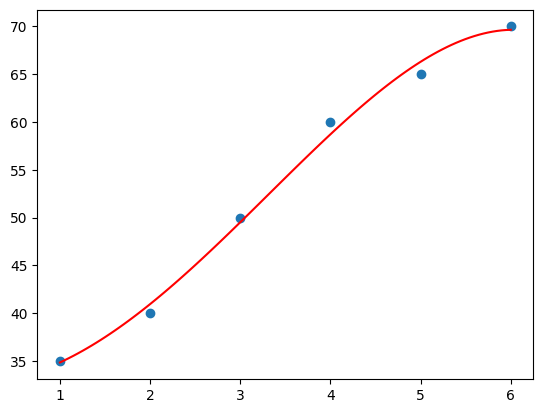

In [21]:
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_grid_poly=poly.transform(x_grid)
plt.scatter(X,y)
plt.plot(x_grid,lasso.predict(x_grid_poly),color='red')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_pred_ridge))
print("Ridge R2 :", r2_score(y, y_pred_ridge))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred) )
print("Lasso R2 :", r2_score(y, y_lasso_pred) )

Ridge MSE: 0.24058058055628095
Ridge R2 : 0.9985320506949108

Lasso MSE: 0.7727384155729786
Lasso R2 : 0.9952849859388767
